### Chibuzo Ukegbu

## CS534   Collaborator: None.

# Question 1

(20 points) Design and implement an iterative Power Method approach to
determine the first principal component of the PCA transformation.

### Design

Check for the attached paper

In [1]:
def eigenvalue(A, v):
    Av = A.dot(v)
    return v.dot(Av)

          
def Power_iterate(A):
    n, d = A.shape
    v = np.ones(d) / np.sqrt(d)
    e_v = eigenvalue(A, v)

    while True:
        Av = A.dot(v)
        v_nju = Av / np.linalg.norm(Av)

        ev_nju = eigenvalue(A, v_nju)
        if np.abs(e_v - ev_nju) < 0.00001:
            break

        v = v_nju
        e_v = ev_nju

    return ev_nju, v_nju

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#first PCA using power iterative method

class PowerPCA1:
    def _init_(self, n_components=1):
        self.n_components = n_components
        self.components = None
        self.eigval = None
        self.mean = None
        
    
    

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        
        #scaling
        p = preprocessing.StandardScaler()
        X = p.fit_transform(X)

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        #eigenvalues, eigenvectors = np.linalg.eig(cov)
        #eigenval_true, eigenvect_true = np.linalg.eig(cov)
        
        #power method
        eigval, eigvec = Power_iterate(cov)

        eigenvalues = eigval
        eigenvectors = eigvec
        #print('PC1', eigenvectors)
        #print('eigvals', eigenvalues)
        #print('---------------------')
        #print('eigenval Scikit', eigenval_true[0])
        #print('PC1 Scikit',  eigenvect_true[:,0])

        # store first n eigenvectors
        self.components = eigenvectors
        self.eigval = eigenvalues
        #eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        #X = X - self.mean
        
        #scale
        #scaling
        p = preprocessing.StandardScaler()
        X = p.fit_transform(X)
        
        return np.dot(X, self.components.T)


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn import datasets

    # data = datasets.load_digits()
    data = datasets.load_iris()
    X = data.data
    y = data.target

    # Project the data onto the 2 primary principal components
    pca = PowerPCA1()
    pca.fit(X)
    X_projected = pca.transform(X)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)
    
    print('PC1 eigenvectors', pca.components)
    print('PC1 eigenval', pca.eigval)
        #print('eigvals', eigenvalues)

    x1 = X_projected
    print('PC1= \n', x1)

Shape of X: (150, 4)
Shape of transformed X: (150,)
PC1 eigenvectors [ 0.52117705 -0.26907551  0.58042028  0.56487623]
PC1 eigenval 2.938084875172267
PC1= 
 [-2.26456134 -2.0811596  -2.36432965 -2.29956006 -2.38965156 -2.07519228
 -2.4440147  -2.23278134 -2.33496885 -2.18446621 -2.16600263 -2.32609157
 -2.21866541 -2.63338376 -2.1981927  -2.26142329 -2.20715066 -2.19020545
 -1.89815812 -2.34303679 -1.9142025  -2.20674058 -2.7742096  -1.81864425
 -2.22712279 -1.9520305  -2.05107996 -2.16842183 -2.13947111 -2.26536086
 -2.14027064 -1.83146991 -2.61441959 -2.44554387 -2.11011032 -2.2078695
 -2.04495128 -2.52715737 -2.42989876 -2.16963143 -2.28634495 -1.85881077
 -2.55377939 -1.96430849 -2.13672251 -2.06995362 -2.38440308 -2.39448996
 -2.22915254 -2.20383063  1.10203529  0.73151251  1.24116077  0.40696635
  1.07541327  0.38851259  0.74675737 -0.48786828  0.92791109  0.01112166
 -0.11097793  0.44067479  0.56158855  0.71950701 -0.03348399  0.87555708
  0.35019384  0.15857676  1.22461581  0.1

# Question 2

(20 points) Design and implement an iterative Power Method
approach to determine the second principal component of the PCA
transformation.

## Design 
1. Compute the p-dimensional mean vector for each feature in the data.
2. Center each data using the computed mean in 1
3. Preprocess the data
3. Compute the covariance matrix. 
4. use the power method on the computed covariance to get the optimal eigenvalue and eigenvector

Now 

5. Project our data orthogonally to the result obtained in 4, i.e set cov2 = cov1 - x1x2 where x1 and x2 are 
$x1= eigval/(eigvec.T.dot(eigvec))$ and $x2=eigvec.dot(eigvec.T)$. eigval and eigvec are the results obtained  in 4.

6. use the power method on the result obtained from 5 to get the optimal eigenvalue and eigenvector
7. Compute the PC2 by taking the dot product of data and the computed eigenvector.

In [3]:
class SecondPCA:
    def _init_(self, n_components=1):
        self.n_components = n_components
        self.components = None
        self.eigvals = None
        self.mean = None
        
    
    

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        
        #scaling
        p = preprocessing.StandardScaler()
        X = p.fit_transform(X)

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        #eigenvalues, eigenvectors = np.linalg.eig(cov)
        #eigenval_true, eigenvect_true = np.linalg.eig(cov)
        
        #power method
        eigval, eigvec = Power_iterate(cov)
       
        eigvec =eigvec.reshape(-1,1)
    
        x1 = eigval/(eigvec.T.dot(eigvec))
        x2 = eigvec.dot(eigvec.T)
    
        cov2 = cov - x1*x2  
    
        eigval2, eigvec2 = Power_iterate(cov2)
        #eigenpair2 = power_iter(B)

        eigenvalues = eigval2
        eigenvectors = eigvec2
        #print('PC2', eigenvectors)
        #print('eigval', eigenvalues)
        #print('---------------------')
        #print('true-eigenvalue Scikit', eigenval_true[1])
        #print('PC2 Scikit',  eigenvect_true[:,1])

        # store first n eigenvectors
        self.components = eigenvectors
        self.eigvals = eigenvalues
        #eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        #X = X - self.mean
        
        #scale
        #scaling
        p = preprocessing.StandardScaler()
        X = p.fit_transform(X)
        
        return np.dot(X, self.components.T)


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn import datasets

    # data = datasets.load_digits()
    data = datasets.load_iris()
    X = data.data
    y = data.target

    # Project the data onto the 2 primary principal components
    pca = SecondPCA()
    pca.fit(X)
    X_projected = pca.transform(X)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)
    x2 = X_projected
    
    print('PC2 eigenvectors', pca.components)
    print('PC2 eigenval', pca.eigvals)
    print('PC2 \n', X_projected)

Shape of X: (150, 4)
Shape of transformed X: (150,)
PC2 eigenvectors [0.37682387 0.92358371 0.02396627 0.06650206]
PC2 eigenval 0.9201654470240775
PC2 
 [ 0.48213766 -0.67221014 -0.33967825 -0.59521882  0.6490847   1.4911326
  0.04999076  0.22523491 -1.11311086 -0.46699579  1.04568865  0.1352792
 -0.7266229  -0.95900418  1.86205584  2.68841499  1.48568387  0.49089147
  1.40674964  1.1300716   0.41059506  0.92621943  0.46100019  0.08727367
  0.13936575 -0.62382683  0.24410472  0.52915879  0.31519063 -0.33559171
 -0.50253874  0.42537832  1.79604087  2.15301532 -0.45824198 -0.20406359
  0.66341127  0.59467194 -0.90186706  0.27089386  0.44387035 -2.33569618
 -0.47665509  0.47421832  1.14427414 -0.70911528  1.12267997 -0.38397502
  1.0000297   0.01126675  0.86183741  0.59391318  0.61505065 -1.75478971
 -0.20948962 -0.593631    0.77233839 -1.85193411  0.03126768 -1.03395099
 -2.65397473 -0.06368006 -1.76536239 -0.18691106 -0.43894359  0.50816804
 -0.19657036 -0.79228819 -1.62346454 -1.302788

# Problem Number 3

 (10 points) Describe the benefit of a gradient approach w.r.t.
the SVD approach for the PCA transformation

## Singular Value Decomposition
Gradient approach allows one to compute only the components that are needed,while SVD computes everything.Also,the SVD approach to the PCA transformation is extremely expensive because one must compute the matrices $A^TA$ and $AA^T$ and the eigenvalues and eigenvectors of these matrices to find the SVD of $A$ (assuming $A$ is the data matrix).

## Comparison to Gradient Approach

The benefit of the gradient approach with regard to PCA is that one does not need to calculate all of the singular vectors that make up the data matrix. Instead, gradient descent can be used to calculate one singular vector at a time. Not minding that the gradient approach can be less precise than the SVD if the gradient descent does not find the exact global maximum, the gradient approach is more efficient than the SVD approach since it only calculates the singular vectors that are needed. If the number of singular vectors that are desired are much smaller than the number of columns in the data, the gradient approach is likely to be more efficient than the SVD approach if implemented efficiently.

# Question 4

(20 points) Using a binary classifier (logistic regression or
SVM) please implement in python both of the 2 different approaches
(one vs. one, one vs. all) to handle the problem of more
than two different classes (use the iris dataset). For
reference use the following link
https://en.wikipedia.org/wiki/Multiclass_classification


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statistics import mode 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

iris = pd.read_csv('https://bitbucket.org/laumiulun/cs534/raw/c42a3c7bd298df0f5b2d779ea4b88a269de7768b/iris.csv')
num_features = 4 #Specify the number of features.
X = iris.values[:,0:num_features] #Splitting the data set into independent features (X) and dependent feature (y).
y = iris.values[:,num_features]
#We check the name of all classes.
pd.unique(iris['species'])
#split the data set into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20220407)
#Lets normalize our data set so that mean = 0 and standard deviation = 1.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## One vs One precedure
We will first perform the multiclass classification using the one vs one procedure using the logistic regression.

In [5]:
# extract setosa and versicolor only from the training set 
X_train_1 = X_train[((y_train == 'setosa') | (y_train == 'versicolor'))]
y_train_1 = y_train[((y_train == 'setosa') | (y_train == 'versicolor'))]
# fit the logistic regression model
lm1 = LogisticRegression(random_state=20200403, class_weight='balanced',penalty='l2')
lm1.fit(X_train_1, y_train_1)
# make predictions for the entire test set
y_pred_1 = lm1.predict(X_test)

In [6]:
# extract setosa and virginica only from the training set 
X_train_2 = X_train[((y_train == 'setosa') | (y_train == 'virginica'))]
y_train_2 = y_train[((y_train == 'setosa') | (y_train == 'virginica'))]
# fit the logistic regression model
lm2 = LogisticRegression(random_state=20200403, class_weight='balanced',penalty='l2')
lm2.fit(X_train_2, y_train_2)
# make predictions for the entire test set
y_pred_2 = lm2.predict(X_test)

In [7]:
# extract versicolor and verginica only from the training set 
X_train_3 = X_train[((y_train == 'versicolor') | (y_train == 'virginica'))]
y_train_3 = y_train[((y_train == 'versicolor') | (y_train == 'virginica'))]
#fit the logistic regression model
lm3 = LogisticRegression(random_state=20200403, class_weight='balanced',penalty='l2')
lm3.fit(X_train_3, y_train_3)
# make predictions for the entire test set
y_pred_3 = lm3.predict(X_test)

In [8]:
#Combine the predictions and each observation is classified to the type with the most vote.
y_pred_combined = np.stack((y_pred_1, y_pred_2, y_pred_3), axis=-1)
y_pred = np.empty(len(y_test), dtype=object)
for index in range(len(y_test)):
    y_pred[index] = mode(y_pred_combined[index])
    print (y_pred[index])

versicolor
virginica
versicolor
setosa
versicolor
setosa
virginica
setosa
setosa
setosa
virginica
setosa
setosa
setosa
virginica
versicolor
setosa
versicolor
versicolor
setosa
versicolor
versicolor
setosa
versicolor
setosa
versicolor
versicolor
setosa
versicolor
setosa
versicolor
versicolor
virginica
versicolor
setosa
virginica
virginica
setosa
versicolor
virginica
setosa
setosa
versicolor
versicolor
versicolor


In [9]:
#calculate the classification accuracy.
np.sum(y_pred == y_test)/len(y_test) 

0.9555555555555556

## One vs Other precedure

In [10]:
#Setosa vs. Versicolor & Virginica
# set the training label as TRUE if setosa and FALSE else
y_train_setosa = (y_train == 'setosa')
# fit the logistic regression model
lm_setosa = LogisticRegression(random_state=20200403, class_weight='balanced', penalty='l2')
lm_setosa.fit(X_train, y_train_setosa)
# make predictions for the entire test set and save the estimated conditional probability that
# the corresponding observation is setosa
y_pred_setosa = lm_setosa.predict_proba(X_test)[:,1]

In [11]:
#Versicolor vs Setosa & Virginica
y_train_versicolor = (y_train == 'versicolor')
# fit the logistic regression model
lm_versicolor = LogisticRegression(random_state=20200403, class_weight='balanced', penalty='l2')
lm_versicolor.fit(X_train, y_train_versicolor)
# make predictions for the entire test set and save the estimated conditional probability that
# the corresponding observation is versicolor
y_pred_versicolor = lm_versicolor.predict_proba(X_test)[:,1]

In [12]:
# Virginica vs Setosa & Versicolor
y_train_virginica = (y_train == 'virginica')
# fit the logistic regression model
lm_virginica = LogisticRegression(random_state=20220407, class_weight='balanced', penalty='l2')
lm_virginica.fit(X_train, y_train_virginica)
# make predictions for the entire test set and save the estimated conditional probability that
# the corresponding observation is virginica
y_pred_virginica = lm_virginica.predict_proba(X_test)[:,1]

In [13]:
#Combine the predictions and each observation is classified to the type with the highest estimated conditional probability.
y_pred_comb = {'setosa': y_pred_setosa, 'versicolor': y_pred_versicolor, 'virginica': y_pred_virginica}
y_pred_comb = pd.DataFrame(data=y_pred_comb)
y_pred_comb.head(6)

,setosa,versicolor,virginica
0,0.057128,0.597762,0.124934
1,0.000030,0.815603,0.997979
2,0.069706,0.743636,0.050976
3,0.956503,0.465152,0.000052
4,0.006395,0.707979,0.386228
5,0.982208,0.257080,0.000021


In [14]:
y_pred = y_pred_comb.idxmax(axis=1)
y_pred.head(6)

0    versicolor
1     virginica
2    versicolor
3        setosa
4    versicolor
5        setosa
dtype: object

In [15]:
#We calculate the classification accuracy.
np.sum(y_pred == y_test)/len(y_test)

0.9777777777777777

# Question 5

(20 points) Extensively describe the overfitting and
underfitting problem. Use execution examples with a decision
tree and SVM (with or without kernel). Use the scikit
implementations. Show underfitting, good behavior, and overfitting examples.

Underfitting refers to a model that can neither model the training data nor generalize to new data[1].
Underfitting takes place when a model has high bias (or error) when evaluated on both the training and testing dataset. An underfit model likely will have low variance in error between the training and testing set,tantamount to poor performance in both the training and testing dataset.

That is to say that underfitting takes place when a model has not found the generalizable patterns in the dataset used for predictions. This implies that the model needs to be trained to a greater extent by increasing the number of epochs, increasing the complexity of the model, or giving the model access to more data.In training the model for more epochs, the model will have a higher probability of arriving at a local minimum of loss in the training data and finding generalizable patterns. 

In increasing the complexity of the model, more complex patterns could be found in the training dataset. By giving the model more data, it may be able to train on additional samples or features such that the model may find new patterns that could be used for prediction.

Overfitting:
Overfitting,according to Brownlee[1] happens when a model learns the detail and noise in the training dataset to the expanse that it negatively affects the performance of the model on a test dataset. This basically means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new dataset or test data and adversely impact the model's ability to generalize.

Overfitting is more evident with nonparametric and nonlinear models that have more flexibility when learning a target function. As such, many nonparametric machine learning algorithms also include parameters or techniques to limit and constrain how much detail the model learns.

For example, decision trees are a nonparametric machine learning algorithm that is very flexible and is subject to overfitting training data. This problem can be addressed by pruning a tree after it has learned in order to remove some of the detail it has picked up.

## Execution examples of overfitting and underfitting with a Decision Tree classifier

In [16]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets # used for the iris data as an example
from sklearn.model_selection import train_test_split # used to test models

def train_dec_tree(X, y, test_size=0.5, num_features=3, max_depth=None): 
  # Train
    X_train, X_test, y_train, y_test = train_test_split(X[:,:num_features], y, 
                    test_size=test_size, random_state=42)
    model = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    model.fit(X_train, y_train)

      # Evaluate
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    return (np.mean(y_pred_train == y_train), np.mean(y_pred == y_test))

for dataset in [("IRIS", datasets.load_iris(return_X_y=True)), 
                ("WINE", datasets.load_wine(return_X_y=True))]:
    name, data = dataset
    print("\n\n====================================================")
    print("The decision tree was trained on the {} dataset.".format(name))
    print("Various parameters were changed to showcase underfitting and overfitting")
    X, y = data
    results = {}
for test_size in [0.1, 0.5, 0.9]:
    for num_feat in range(1, len(np.unique(y))):
        for max_depth in [1, 5, 50]:
            acc_train, acc_test = train_dec_tree(X, y, test_size, num_feat, max_depth)

        
        # For Overfitting
        if acc_train - acc_test > 0.3:
            print("\n\n====================================================")
            print("\nWhen the decision tree model was trained with the following params:")
            print("  Testing data percent of total:", test_size)
            print("  Number of data features used:", num_feat)
            print("  Maximum depth of decision tree:", max_depth)
            print("The evaluation went as follows:")
            print("  Training data accuracy:", acc_train)
            print("  Testing data accuracy:", acc_test)
            explain = []
          
            if test_size > 0.7:
                explain.append("the training data was too small, meaning the model overfit on the the few patterns it found in the training data")
                if num_feat > 2:
                    explain.append("too many features were used, making the model too complex")
                  # leading the model to perhaps focus too much on certain features that are not useful for generalizations outside the training data
                    if max_depth > 5:
                        explain.append("the model was too deep, which made it too complex")

                        print("This is a case of OVERFITTING because", "\nAND ".join(explain) + ".")
        
        # For Underfitting
        if acc_test < 0.7 and acc_train < 0.7:
            print("\n\n====================================================")
            print("\nWhen the decision tree model was trained with the following params:")
            print("  Testing data percent of total:", test_size)
            print("  Number of data features used:", num_feat)
            print("  Maximum depth of decision tree:", max_depth)
            print("The evaluation went as follows:")
            print("  Training data accuracy:", acc_train)
            print("  Testing data accuracy:", acc_test)
            explain = []
          
            if test_size > 0.7:
                explain.append("the model had too little training data to find generalizable patterns")
                if num_feat < 3:
                    explain.append("too few features were used to find generalizable patterns")
                    if max_depth < 5:
                        explain.append("the model was shallow, making it too simple to find the complex patterns in the data")

                        print("This is a case of UNDERFITTING because", "\n  AND ".join(explain) + ".")



The decision tree was trained on the IRIS dataset.
Various parameters were changed to showcase underfitting and overfitting


The decision tree was trained on the WINE dataset.
Various parameters were changed to showcase underfitting and overfitting



When the decision tree model was trained with the following params:
  Testing data percent of total: 0.1
  Number of data features used: 1
  Maximum depth of decision tree: 50
The evaluation went as follows:
  Training data accuracy: 0.90625
  Testing data accuracy: 0.3888888888888889



When the decision tree model was trained with the following params:
  Testing data percent of total: 0.5
  Number of data features used: 1
  Maximum depth of decision tree: 50
The evaluation went as follows:
  Training data accuracy: 0.9550561797752809
  Testing data accuracy: 0.5730337078651685



When the decision tree model was trained with the following params:
  Testing data percent of total: 0.9
  Number of data features used: 1
  Maximum depth o

## Execution examples of overfitting and underfitting with an SVD classifier

In [17]:
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets # used for the iris data as an example
from sklearn.model_selection import train_test_split # used to test models

def train_svd(X, y, test_size=0.5, num_features=3, max_iter=-1): 
  # Train
    X_train, X_test, y_train, y_test = train_test_split(X[:,:num_features], y, 
                                           test_size=test_size, random_state=42)
    model = SVC(random_state=42, max_depth=max_depth)
    model.fit(X_train, y_train)

  # Evaluate
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    return (np.mean(y_pred_train == y_train), np.mean(y_pred == y_test))

for dataset in [("IRIS", datasets.load_iris(return_X_y=True)), 
                ("WINE", datasets.load_wine(return_X_y=True))]:
    name, data = dataset
   # print("\n\====================================================")
    print("The SVM was trained on the {} dataset.".format(name))
    print("Various parameters were changed to showcase underfitting and overfitting")
    X, y = data
    results = {}
    for test_size in [0.1, 0.5, 0.9]:
        for num_feat in range(1, len(np.unique(y))):
            for max_iters in [1, 50, 10000]:
                acc_train, acc_test = train_dec_tree(X, y, test_size, num_feat, max_iters)

        
        # Overfitting case
        if acc_train - acc_test > 0.3:
            #print("\n\n\n====================================================")
            print("\nWhen the SVM was trained with the following params:")
            print("  Testing data percent of total:", test_size)
            print("  Number of data features used:", num_feat)
            print("  Maximum iterations when training:", max_iters)
            print("The evaluation went as follows:")
            print("  Training data accuracy:", acc_train)
            print("  Testing data accuracy:", acc_test)
            explain = []
            if test_size > 0.7:
                explain.append("the training data was too small, meaning the model overfit on the the few patterns it found in the training data")
                if num_feat > 2:
                    explain.append("too many features were used, making the model too complex")
                    if max_iters > 40:
                        explain.append("the model was trained for too long, which made it mostly focus on the patterns in the training data")

                        print("This is a case of OVERFITTING because", "\n  AND ".join(explain) + ".")
        
        # Underfitting case
        if acc_test < 0.6 and acc_train < 0.6:
           # print("\n\n\n====================================================")
            print("\nWhen the SVM was trained with the following params:")
            print("  Testing data percent of total:", test_size)
            print("  Number of data features used:", num_feat)
            print("  Maximum iterations when training:", max_iters)
            print("The evaluation went as follows:")
            print("  Training data accuracy:", acc_train)
            print("  Testing data accuracy:", acc_test)
            explain = []
            if test_size > 0.7:
                explain.append("the model had too little training data to find generalizable patterns")
                if num_feat < 3:
                    explain.append("too few features were used to find generalizable patterns")
                    if max_iters < 50:
                        explain.append("the model was trained for too few iterations")
                        print("This is a case of UNDERFITTING because", "\n  AND ".join(explain) + ".")

The SVM was trained on the IRIS dataset.
Various parameters were changed to showcase underfitting and overfitting

When the SVM was trained with the following params:
  Testing data percent of total: 0.9
  Number of data features used: 2
  Maximum iterations when training: 10000
The evaluation went as follows:
  Training data accuracy: 1.0
  Testing data accuracy: 0.42962962962962964
The SVM was trained on the WINE dataset.
Various parameters were changed to showcase underfitting and overfitting


# Question 6
(10 points) Show examples when the use of
kernel procedure is more efficient in terms of training and
prediction computational time w.r.t. polynomial features
transformation

Kernel methods are more efficient than polynomial feature transformation especially when dealing with high-dimensional data set. Suppose we are dealing with n-dimensional data set such that observations has the form
$$x = (x_1, x_2, \ldots, x_n)$$
$$y = (y_1, y_2, \ldots, y_n)$$
and wish to map the inner product of <x, y> to the inner product of transformed versions of them: $<\phi(x), \phi(x)>$, so we can measure the similarity of x and y in the new space.

If we use the polynomial feature transformation, then we would first need to map $x$ and $y$ into
$$\phi(x) = (x_1^n, x_1^{n-1} x_2, \ldots, x_n^n)$$
$$\phi(y) = (y_1^n, y_1^{n-1} y_2, \ldots, y_n^n)$$
which requires $2 n^2$ computations to perform, then it would need to compute $<\phi(x), \phi(x)>$ which requires another $n^2 + 1$ computations ($n^2$ scalar multiplications and 1 addition).

That is, the polynimial feature transformation requires a total of $3n^2$ computations to obtain $<\phi(x), \phi(x)>$.

On the other hand, kernel methods allows the use to map the data into said higher-dimention without having to actually transform the data first. Let's consider the polynomial kernel, $k(x,y) = (x^T y)^n$ which is equivalent to $<\phi(x), \phi(x)>$.

To evaluate $k(x,y) = (x^T y)^n$, the polynomial kernel would need to compute
$$x^T y = x_1 y_1 + x_2 y_2 + \cdots + x_n y_n$$
which requires $n + 1$ computations to perform (n scalar multiplications and 1 addition). Then the kernel would just need to multiply $x^T y$ n times, which requires 1 computation (since it is just taking a power of a scalar).

That is, the polynimial kernel requires a total of $n+2$ computations to obtain $<\phi(x), \phi(x)>$ which is much smaller than $3n^2$ of the polynimial feature transformation.

We can see the difference between the number of computations required gets much larger as $n$ gets larger.

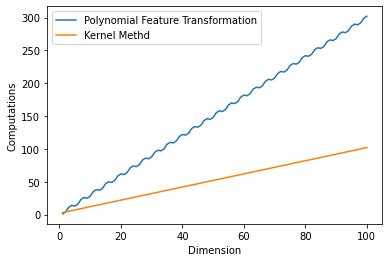

In [18]:
aa = range(1,101)
trans = np.zeros(max(aa))
kernel = np.zeros(max(aa))
for i in aa:
    trans[i-1] = 3*i^2
    kernel[i-1] = i+2
fig = plt.figure()
ax = plt.axes()
ax.set(xlabel='Dimension', ylabel='Computations');
ax.plot(aa, trans, label = 'Polynomial Feature Transformation');
ax.plot(aa, kernel, label = 'Kernel Methd');
plt.legend();

**Consequently, we can see that the use of kernel procedure is more effective in terms of training and prediction computational time w.r.t. polynomial features transformation when we are dealing with a high dimensional data set.**

# Question 7

(10 points) Write a procedure to estimate in the SVC
classifier (in Scikit) the best kernel (RBF, Polynomial,
sigmoid), the best gamma & degree, and the best C. Use the
grid search without implement it. Use the following
reference:

    a. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
    
    b. https://scikit-learn.org/stable/modules/grid_search.html

In [19]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import datasets 

dataset = datasets.load_iris(return_X_y=True)
for dataset in [("IRIS", datasets.load_iris(return_X_y=True))]: 
  # use this line to try a different dataset:
  #("BREAST CANCER", datasets.load_breast_cancer(return_X_y=True))]:

    name, data = dataset
    print("\nThe results for the", name, "dataset were the following:")
    X, y = data
    parameters = {'kernel': ['rbf', 'poly', 'sigmoid'],
                'gamma':  ['scale', 'auto'] + np.linspace(0,1,10).tolist(),
                'degree': list(range(1, 5)),
                'C': np.linspace(0.001,100,20).tolist()}
    grid_searcher = GridSearchCV(SVC(), parameters, n_jobs=20)
    grid_searcher.fit(X, y)
    SVC_best = grid_searcher.best_estimator_

    print("The best SVC classifier found was the following:")
    print(SVC_best)
    print("The best parameters found were the following:\n  ", grid_searcher.best_params_)
    print("This classifier resulted in the best accuracy of {:5f}%".format(grid_searcher.best_score_ * 100))


The results for the IRIS dataset were the following:
The best SVC classifier found was the following:
SVC(C=0.001, gamma=0.3333333333333333, kernel='poly')
The best parameters found were the following:
   {'C': 0.001, 'degree': 3, 'gamma': 0.3333333333333333, 'kernel': 'poly'}
This classifier resulted in the best accuracy of 98.666667%


 # Question 8
 (20 points) Create examples to explain the property and the
importance of the following kernels:
    
    a. https://en.wikipedia.org/wiki/Graph_kernel
    
    b. https://en.wikipedia.org/wiki/String_kernel

    c. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.sigmoid_kernel.html

## Graph Kernel
 
Graph kernels are used to measure the similarities between two graphs. Suppose that $G_1$ and $G_2$ are graphs and $P$ is their cartesian product graph. Then the geometric random walk kernel (which is one of graph kernel methods) is defined as

$$K^\infty_X (G_1, G_2) = e^T (I - \lambda A(P))^{-1} e$$

where $A(P)$ is the adjacency matrix of $P$ $I$ is the identity matrix, $e$ is the all-ones vector, and $\lambda$ is a positive, real-valued weight. The geometric random walk kernel converges only if $\lambda < 1/\lambda_X$ where $\lambda_X$ is the largest eigenvalue of $A(P)$.

Nodes of graph: 
['1', '2', '3', '4']
Edges of graph: 
[('1', '2'), ('1', '3'), ('2', '4')]


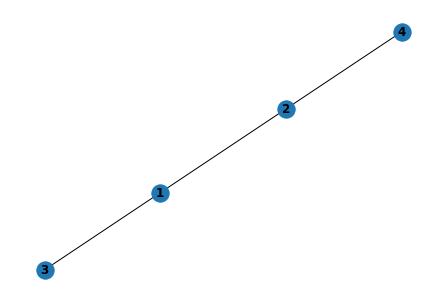

In [20]:
import networkx as nx
M1=nx.Graph()
M1.add_nodes_from(["1","2","3", "4"])
M1.add_edges_from([("1","2"),("1","3"), ("2","4")])
print("Nodes of graph: ")

print(M1.nodes())
print("Edges of graph: ")
print(M1.edges())
#M1.color_map("red")
nx.draw(M1,with_labels=True,font_weight='bold' )

Nodes of graph: 
['1', '2', '3', '4']
Edges of graph: 
[('1', '2'), ('1', '3'), ('1', '4'), ('2', '3'), ('2', '4'), ('3', '4')]


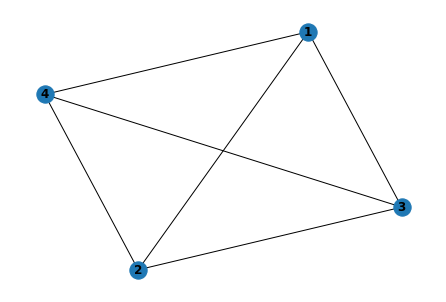

In [21]:
M2=nx.Graph()
M2.add_nodes_from(["1","2","3","4"])
M2.add_edges_from([("1","2"),("1","3"), ("1", "4"), ("2","3"), ("2", "4"), ("3", "4")])
print("Nodes of graph: ")
print(M2.nodes())
print("Edges of graph: ")
print(M2.edges())
nx.draw(M2,with_labels=True,font_weight='bold')

We obtain the product graph of M1 and M2, denoted P.

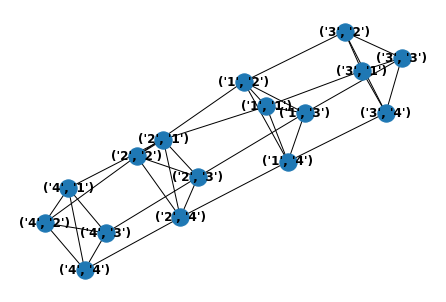

In [22]:
P = nx.cartesian_product(M1,M2)
nx.draw(P,with_labels=True,font_weight='bold')

We find the reciprocal of the largest eigenvalue of the adjacency matrix of  P .

In [23]:
# Obtain the adjacency matrix of P
mp = nx.adjacency_matrix(P)
mp = mp.todense()
# Find the eigenvalue of A(P)
evalue, evector = np.linalg.eig(mp)
1/max(evalue)

(0.2165423646591007+0j)

We choose  λ  as 0.2 and calculate the geometric random walk kernel.

In [24]:
lmda = 0.2
e = np.ones(len(mp))
I = np.identity(len(mp))
np.matmul(np.matmul(e.T,np.linalg.inv(I - lmda*mp)),e)

matrix([[200.]])

We get 200 as the geometric random walk kernel of M1 and M2.

To compare, we calculate the geometric random walk kernel of M1 and M1. We expect it to be much smaller than that for M1 and M2.
We obtain the product graph of M1 and M1, denoted P1.

In [25]:
P1 = nx.cartesian_product(M1,M1)
# Obtain the adjacency matrix of P
mp1 = nx.adjacency_matrix(P1)
mp1 = mp1.todense()
# Find the eigenvalue of A(P)
evalue1, evector1 = np.linalg.eig(mp1)
1/max(evalue1)

0.3090169943749482

We choose  λ  as 0.2 and calculate the geometric random walk kernel.

In [26]:
lamda = 0.2
a = np.ones(len(mp1))
c = np.identity(len(mp1))
np.matmul(np.matmul(e.T,np.linalg.inv(I - lmda*mp1)),e)

matrix([[42.72727273]])

We got 42.72727273 as the geometric random walk kernel of M1 and M1, which is much smaller than the one for M1 and M2, as expected.
This has demonstrated that the geometric random walk kernel measures the similarity between two graphs,which is pretty cool cause it is ordinarily difficult to measure the similarity between two graphs



### String Kernel

The string kernel is a type of kernel that calculates a kind of distance metric between strings such that this distance can be used for classification by a model like the SVM. For example, the String Subsequence Kernel (SSK) "maps strings to a feature vector indexed by all k tuples of characters. A k-tuple will have a non-zero entry if it occurs as a subsequence anywhere (not necessarily contiguously) in the string" [4]. The SSK can is primarily used in bioinformatics applications where data is stored as strings, but the kernel could in theory be used on any kind of string, such as natural language. The SSK allows us to train SVM classifiers on strings (or text) without having to engineer the features ourselves. 
<!-- 
As described in [4] and summarized by wikipedia, the SSK is formulated as follows:
$\varphi :
    \alpha(x)=\left\{
                \begin{array}{ll}
                  \Sigma^n \rightarrow \mathbb{R}^{\Sigma^n}\\
                  \frac{1}{1+e^{-kx}}
                \end{array}
              \right.
$ -->

For example, if I have the RNA sequence for several different viruses, I can represent this data as a string composed of 'A's, 'C's, 'G's, and 'U's [5](https://en.wikipedia.org/wiki/RNA#Structure). I can then use the SSK with an SVM classifier to try to classify the virus RNA sequence as "deadly" or "not deadly" by looking at the death count of the viruses. If, for example, more than 1,000 people were killed, I would label the RNA sequence as "deadly". By using subsequences (k-tuples) of the string, the SSK may be able to find useful patterns in the RNA sequences that show how certain groupings of nucleotides might lead to a virus being dangerous. If a new virus appears, I could in theory sequence the RNA of the new virus and give it to my SVM classifier to determine if the virus might be dangerous.

Assuming we want to compare some text passages automatically and indicate their relative similarity. For many applications, it might be sufficient to find some keywords which match exactly. One example where exact matching is not always enough is found in spam detection. An alternate way would be in computational gene analysis, where homologous genes have mutated, resulting in common subsequences along with deleted, inserted or replaced symbols.[10](https://en.wikipedia.org/wiki/String_kernel)



Without a string kernel, an SVM may have a difficult (if not impossible) time finding relevant patterns in large strings. Instead, I may need to engineer the features I give to the SVD by counting hard-coded sequences that I would have to figure out myself. By finding patterns in strings that provide a sort of similarity or distance between strings, string kernels such as SSK are extremely useful for processing this kind of string data. 

To implement the SSK kernel, I would recommend using the [6](https://github.com/helq/python-ssk) library.



Here is a mathematical example for the SSK as defined by [4](http://jmlr.csail.mit.edu/papers/volume2/lodhi02a/lodhi02a.pdf). They define the SSK as follows:

$K_n(s,t) = \Sigma_{u\in\Sigma^n} \Sigma_{i:u=s[i]} \Sigma_{j:u=t[j]} \lambda^{l(i) + l(j)}$

Let $s = cat$ and $t = hat$, and use a k-tuples where $k = n = 2$. Let the decay factor $\lambda = 0.5$.

Therefore, $\Sigma_n = \begin{bmatrix} ab & hk & ad & et & ot \end{bmatrix}$ (all of the continuous and non-continuous finite tuples in the strings)

We can then count how often the tuples occur in each string, where the second column is string $s$ and the third column is string $t$:

$\begin{bmatrix} ab & 1 & 0
              \\ hk & 0 & 1
              \\ ad & 1 & 1
              \\ et & 1 & 0
              \\ ot & 0 & 1 \end{bmatrix}$

We can finally sum all of the terms in $\Sigma_{u\in\Sigma^n} \Sigma_{i:u=s[i]} \Sigma_{j:u=t[j]} \lambda^{l(i) + l(j)}$. Since only one tuple occurs in both $s$ and $t$, $K_2(cat,hat) = \lambda^{l(at) + l(at)} = 0.5^{2 + 2} = 0.25$





## The Sigmoid Kernel

The sigmoid kernel is a type of kernel that models an activation function in traditional neural networks. It produces a distance between two vectors by applying a non-linear function to the dot product of the two vectors. It is defined mathematically as follows ([8](https://scikit-learn.org/stable/modules/metrics.html#sigmoid-kernel)):

$k(x,y) = tanh(\gamma x^Ty + c_0)$

where $x$ and $y$ are the input vectors, $\gamma$ is a hyperparameter known as the slope, and $c_0$ is a hyperparameter known as the intercept. The $\gamma$ value can be seen as a "scaling parameter" of the input, while the $c_0$ can be seen as a "shifting parameter" of the input ([7](https://www.csie.ntu.edu.tw/~cjlin/papers/tanh.pdf))

Although the sigmoid kernel can behave like the RBF kernel when the $\gamma$ is close to zero and $c_0$ is less than 0 ([7](https://www.csie.ntu.edu.tw/~cjlin/papers/tanh.pdf)), an advantage of using the sigmoid kernel is that an SVM that uses a sigmoid kernel is similar to a neural network containing two layers ([9](http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/#sigmoid)). However, [7](https://www.csie.ntu.edu.tw/~cjlin/papers/tanh.pdf) show that the sigmoid kernel is not better than an RBF kernel in most cases, as the sigmoid kernel is only conditionally positive definite and not always a valid kernel when certain parameters are used. 

In their paper, [7](https://www.csie.ntu.edu.tw/~cjlin/papers/tanh.pdf) do not recommend the use of a sigmoid kernel over an RBF kernel. They summarize their reasons on page 26: "The sigmoid kernel seems to work well in practice, but it is not better than RBF. As RBF has properties of being PD [positive definite] and having fewer parameters, somehow there is no strong reason to use the sigmoid [kernel]".

Although the sigmoid kernel was popularized because of its origin from neural network activation functions which share a similar formulation, it is important to consider the sigmoid kernel for the properties it truly holds. As Lin et al. show, it is unlikely that you will ever need to use the sigmoid kernel in place of the RBF kernel. 



Here is an easy mathematical example:

Let $x = \begin{bmatrix} 1\\0 \end{bmatrix}$ and let $y = \begin{bmatrix} 0\\1 \end{bmatrix}$. Let $\gamma = 0.1$ and let $c_0 = 1$.

Then $k(x,y) = tanh(\gamma x^Ty + c_0) = tanh(0.1 \begin{bmatrix} 1&&0 \end{bmatrix} \begin{bmatrix} 0\\1 \end{bmatrix} -1) = tanh(-1) = -0.7615942$

## References
[1] https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/
[2]https://en.wikipedia.org/wiki/Graph_kernel
[3]http://www.cs.cmu.edu/~ukang/papers/fast_rwgk.pdf
[4]https://jmlr.csail.mit.edu/papers/volume2/lodhi02a/lodhi02a.pdf
[5]https://en.wikipedia.org/wiki/RNA#Structure
[6]https://github.com/helq/python-ssk
[7]https://www.csie.ntu.edu.tw/~cjlin/papers/tanh.pdf))
[8]https://scikit-learn.org/stable/modules/metrics.html#sigmoid-kernel)):
[9](http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/#sigmoid)
[10]https://en.wikipedia.org/wiki/String_kernel



